In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

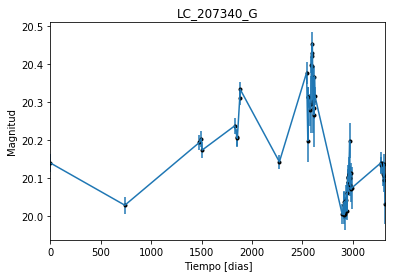

In [2]:
data = np.genfromtxt('LC_207340_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_207340_G')
plt.savefig("LC_207340_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

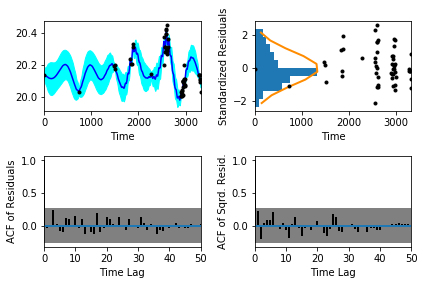

In [5]:
sample.assess_fit()

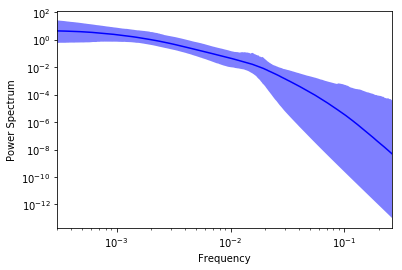

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

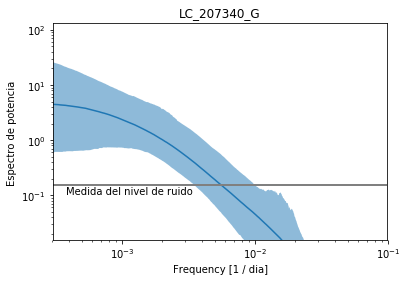

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_207340_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_207340_G')

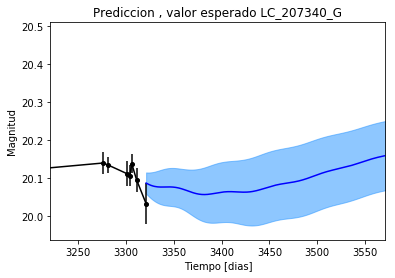

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_207340_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_207340_G')

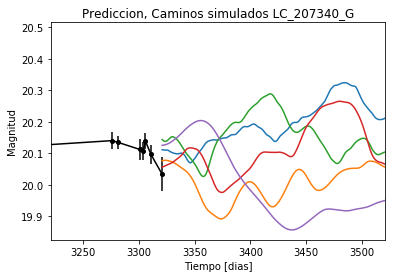

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_207340_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


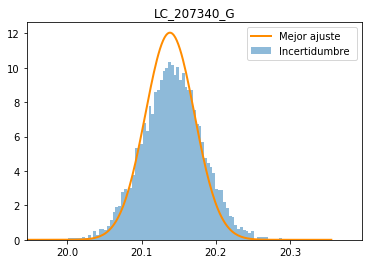

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_207340_G')
plt.savefig("Mejor_ajuste_LC_207340_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_207340_G')

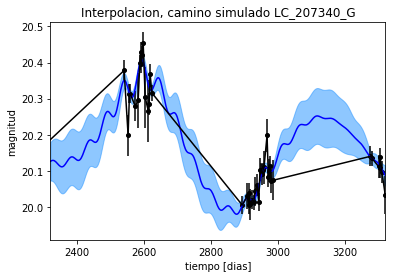

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_G')

Text(0.5,1,'Interpolacion, camino simulado LC_207340_G')

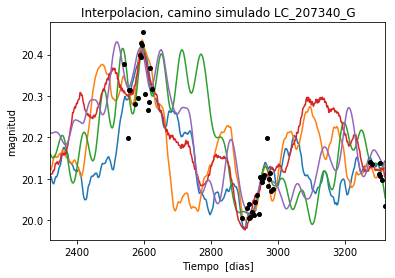

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 569.975964457
Median: 0.016300789487
Standard deviation: 0.10852194648
68% credibility interval: [ 0.00149554  0.14396568]
95% credibility interval: [ 0.00041897  0.412327  ]
99% credibility interval: [  3.28057853e-04   4.96206874e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 808.075508158
Median: 0.00546473509578
Standard deviation: 0.0523938319298
68% credibility interval: [ 0.00092019  0.03671544]
95% credibility interval: [ 0.00039157  0.18517148]
99% credibility interval: [  3.14769785e-04   3.53354553e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 454.119446592
Median: 0.0449383770973
Standard deviation: 0

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 835.833270308
Median: 108.937633323
Standard deviation: 1.8628222305
68% credibility interval: [ 107.02068395  110.29509825]
95% credibility interval: [ 104.31480443  111.88633409]
99% credibility interval: [ 102.0551205   112.79239213]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 534.172623025
Median: 0.833613850681
Standard deviation: 1.30148130237
68% credibility interval: [ 0.10273415  2.65731451]
95% credibility interval: [ 0.02191756  4.55817185]
99% credibility interval: [ 0.01493356  5.83901176]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 349.191813681
Median: 0.390857721762
Standard deviation: 2.66239242576
68% credibility interval: [ 0.01919719  3.23471817]
95% credibility interval: [  8.31024555e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 7610.10492069
Median: 1.08060058351e-26
Standard deviation: 1.0278943475e+17
68% credibility interval: [  9.40344538e-52   3.31936363e-06]
95% credibility interval: [  6.38772830e-110   3.55481843e+003]
99% credibility interval: [  2.08106229e-125   3.79340252e+005]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3275.30321921
Median: 20.161363809
Standard deviation: 0.0562777366497
68% credibility interval: [ 20.11146461  20.20850542]
95% credibility interval: [ 20.03628968  20.26802239]
99% credibility interval: [ 19.97226161  20.32457664]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 336.197938602
Median: 0.0167214559927
Standard deviation: 0.126430356272
68% credibility interval: [ 0.          0.19024595]
95% credibility interval: [ 0.          0.44443911]
99% credibility interval: [ 0.          0.51033227]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 336.197938602
Median: 0.0167214559927
Standard deviation: 0.126430356272
68% credibility interval: [ 0.          0.19024595]
95% credibility interval: [ 0.          0.44443911]
99% credibility interval: [ 0.          0.51033227]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 545.25258622
Median: 0.0
Standard deviation: 0.000651612487038
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 835.833270308
Median: 108.937633323
Standard deviation: 1.8628222305
68% credibility interval: [ 107.02068395  110.29509825]
95% credibility interval: [ 104.31480443  111.88633409]
99% credibility interval: [ 102.0551205   112.79239213]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1588.34311005
Median: 0.016431512774
Standard deviation: 0.0145201951506
68% credibility interval: [ 0.01014231  0.02907103]
95% credibility interval: [ 0.00673672  0.05537865]
99% credibility interval: [ 0.00541536  0.0914899 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1285.04506984
Median: 0.993599542019
Standard deviation: 0.164969935412
68% credibility interval: [ 0.85545455  1.16558676]
95% credibility interval: [ 0.73742553  1.38709834]
99% credibility interval: [ 0.66828869  1.55693334]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 379.043405953
Median: 0.000474942806418
Standard deviation: 0.0229063301316
68% credibility interval: [  1.10839124e-05   7.78605392e-03]
95% credibility interval: [  3.39787683e-07   5.77164775e-02]
99% credibility interval: [  6.88456701e-10   1.66768193e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 569.975964457
Median: (-0.102420881-0.619317076307j)
Standard deviation: 1.04689346516
68% credibility interval: [-0.90456305+0.j         -0.00939673-0.08632017j]
95% credibility interval: [-2.59072693+0.j         -0.00263247-2.76986216j]
99% credibility interval: [ -3.11775974e+00+0.j          -2.06124828e-03-2.56133168j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 808.075508158
Median: (-0.0343359432614+0.029016924219j)
Standard deviation: 0.859895829333
68% credibility interval: [-0.23068993+0.27186189j -0.00578175+0.11370527j]
95% credibility interval: [-1.16346673+2.42861266j -0.00246030+0.00900511j]
99% credibility interval: [ -2.22019213e+00+3.2225066j   -1.97775689e-03+0.08803388j]
Posterior summary for par